# Exc04a

In [1]:
# import modules
import numpy as np
import sklearn
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

In [3]:
# IMPORTING LIBRARIES

print("importing libraries")
import pandas as pd                                     # for dealing with csv import
import numpy as np                                      # arrays and other matlab like manipulation
import os                                               # for joining paths and filenames sensibly
import matplotlib.pyplot as plt                         # Matplotlib's pyplot: MATLAB-like syntax
import scipy.stats.mstats as ssm                        # for bootstrap
from scipy.stats import gaussian_kde as kde
import random

%matplotlib inline
import seaborn as sns                                   # For pretty plots

# from mpld3 import display_d3
# mpld3.enable_notebook()                               # Uncomment these lines to use interactive plots as a default. This can lead to slow loading of the notebook
# mpld3.disable_notebook()

importing libraries


In [4]:
# Import original data, then do a bit of data-munging to get it in displayable form.
print("loading data from file")
filename=os.path.join('Downloads/CrowdstormingDataJuly1st.csv') 
df = pd.read_csv(filename)

loading data from file


In [5]:
# Display the first 10 rows of the dataset. Only 13 columns for space reasons
df.iloc[:5,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0


In [6]:
df.iloc[:5,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [7]:
# Load disaggregated data
print("loading disaggregated data")
filename=os.path.join('crowdstorm_disaggregated.csv') 
dfd = pd.read_csv(filename)

loading disaggregated data


In [8]:
dfd.iloc[:5,:16]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0


In [9]:
dfd.iloc[:5,16:]

,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,allreds,allredsStrict,refCount
0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375,0,0,1
1,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750,0,0,1
2,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3
3,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3
4,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3


## 2.1 Loading and Cleaning the Data (10p)

### feature names

| feature | explanation |
| :- | :- |
| playerShort | short player ID |
| player | player name |
| club | player club |
| leagueCountry | country of player club (England, Germany, France, and Spain) |
| birthday | player birthday |
| height | player height (in cm) |
| weight | player weight (in kg) |
| position | detailed player position  |
| games | number of games in the player-referee dyad |
| victories | victories in the player-referee dyad |
| ties | ties in the player-referee dyad |
| defeats | losses in the player-referee dyad |
| goals | goals scored by a player in the player-referee dyad |
| yellowCards | number of yellow cards player received from referee |
| yellowReds | number of yellow-red cards player received from referee |
| redCards | number of red cards player received from referee |
| photoID | ID of player photo (if available) |
| rater1 | skin rating of photo by rater 1 (5-point scale ranging from  |'93very light skin |'94 to  |'93very dark skin |'94) |
| rater2 | skin rating of photo by rater 2 (5-point scale ranging from  |'93very light skin |'94 to  |'93very dark skin |'94) |
| refNum | unique referee ID number (referee name removed for anonymizing purposes) |
| refCountry | unique referee country ID number (country name removed for anonymizing purposes) |
| meanIAT | mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white | good, black | bad associations  |
| nIAT | sample size for race IAT in that particular country |
| seIAT | standard error for mean estimate of race IAT        |
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |
| nExp | sample size for explicit bias in that particular country |
| seExp | standard error for mean estimate of explicit bias measure |


### Irrelevant features

Some features are less relevant than others. In order to visualize the data easily and to focus on the important features, some of the irrelevant features can be dropped. For the purpose of our analysis, we will drop the short name, the club, the body features (height, weight), the results (victories, ties, defeats, goals) and the sample size and standard errors of the bias indicators.

In [10]:
dfRel = df.drop(['playerShort', 'club', 'height', 'weight', 'victories', 'ties', 'defeats', 'goals', 'refCountry', 'nIAT', 'seIAT', 'nExp', 'seExp'], axis=1)
dfRel

,player,leagueCountry,birthday,position,games,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,Alpha_3,meanIAT,meanExp
0,Lucas Wilchez,Spain,31.08.1983,Attacking Midfielder,1,0,0,0,95212.jpg,0.25,0.50,1,GRC,0.326391,0.396000
1,John Utaka,France,08.01.1982,Right Winger,1,1,0,0,1663.jpg,0.75,0.75,2,ZMB,0.203375,-0.204082
2,Abdón Prats,Spain,17.12.1992,NaN,1,1,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297
3,Pablo Marí,Spain,31.08.1993,Center Back,1,0,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297
4,Rubén Peña,Spain,18.07.1991,Right Midfielder,1,0,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,Tomáš Rosický,England,04.10.1980,Attacking Midfielder,1,0,0,0,444.jpg,0.00,0.00,3147,HUN,0.376127,0.498350
146024,Winston Reid,England,03.07.1988,Center Back,1,0,0,0,53953.jpg,0.25,0.50,3147,HUN,0.376127,0.498350
146025,Xherdan Shaqiri,Germany,10.10.1991,Left Midfielder,1,0,0,0,132744.jpg,0.25,0.25,3147,HUN,0.376127,0.498350
146026,Yassine El Ghanassi,England,12.07.1990,Left Winger,1,0,0,0,129168.jpg,0.50,0.50,3147,HUN,0.376127,0.498350


### Derived features

Let us derive a player's age in the season 2012/13 rounded to years (reference date: 01 Jan 2013).

In [11]:
df[["birthday"]] = df["birthday"].apply(pd.to_datetime)
dfRel['age'] = (pd.to_datetime('2013-01-01') - df[["birthday"]].apply(pd.to_datetime)).astype('<m8[Y]')

In [12]:
dfRel.loc[:5,:]

,player,leagueCountry,birthday,position,games,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,Alpha_3,meanIAT,meanExp,age
0,Lucas Wilchez,Spain,31.08.1983,Attacking Midfielder,1,0,0,0,95212.jpg,0.25,0.50,1,GRC,0.326391,0.396000,29.0
1,John Utaka,France,08.01.1982,Right Winger,1,1,0,0,1663.jpg,0.75,0.75,2,ZMB,0.203375,-0.204082,30.0
2,Abdón Prats,Spain,17.12.1992,NaN,1,1,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297,20.0
3,Pablo Marí,Spain,31.08.1993,Center Back,1,0,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297,19.0
4,Rubén Peña,Spain,18.07.1991,Right Midfielder,1,0,0,0,NaN,NaN,NaN,3,ESP,0.369894,0.588297,21.0
5,Aaron Hughes,England,08.11.1979,Center Back,1,0,0,0,3868.jpg,0.25,0.00,4,LUX,0.325185,0.538462,33.0


### Missing values

The most important issue are the missing skin color values. For 1586 or 2053 players, no photos were available, which constitutes 22.7% of all players. The publication "Many Analysts, One Data Set: Making
Transparent How Variations in Analytic Choices Affect Results" by Silberzahn et al. (2018) (DOI: https://doi.org/10.1177%2F2515245917747646) describes the underlying reasons: "Players for whom no photo was available
tended to be relatively new players or those who had just moved up from a team in a lower league". One can reasonably assume, that there is no direct link between movements directly before the season 2012/13 and the skin color. Instead, it is fair to assume them to be independent for the time being. This implies that the values are missing completely at random (MCAR). However, one has to keep this in mind as an important potential source of bias because is affects about 22.7% of all players. 

### Skin color ratings

Mean skintone across the population = 0.27960527197527524
source: Mat Evans, https://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb


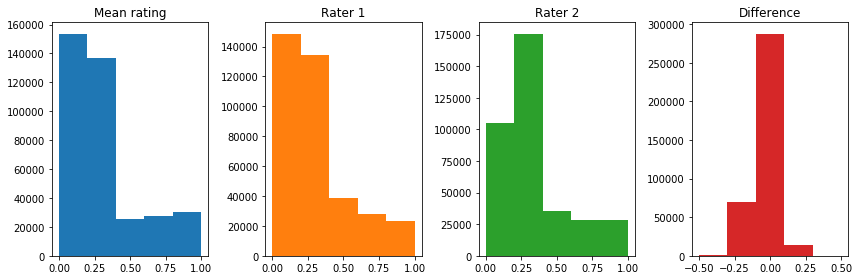

In [13]:
# Plot of skin tone rating distributions, showing skewed nature of the data w/ histograms 
# and degree of disagreement between raters with a scatterplot
rated = ((dfd['rater1']+dfd['rater2'])/2).dropna()

fig, ax = plt.subplots(1,4,figsize=(12, 4))
c = sns.color_palette()
ax[0].hist(rated,bins = 5, range = (0,1),color = c[0])
ax[0].set_title("Mean rating")

ax[1].hist(dfd['rater1'].dropna().tolist(),bins = 5, range = (0,1), color = c[1])
ax[1].set_title('Rater 1')

ax[2].hist(dfd['rater2'].dropna().tolist(),bins = 5, range = (0,1),color = c[2])
ax[2].set_title('Rater 2')

ax[3].hist((dfd['rater1'] - dfd['rater2']).dropna(), bins = 5,range = (-0.5,0.5),color = c[3])
ax[3].set_title('Difference')


fig.tight_layout()

print('Mean skintone across the population =', np.mean(rated))
print('source: Mat Evans, https://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb')

There is a significant difference in the color rating, especially in the bins with values 0.0 and 0.25. Additionally, players with light skin color are much more frequent, therefore those values are statistically more robust than the ones of players with dark skin color. Using the mean rating can to same degree alleviate the natural arbitrariness in assigning discrete skin color values. However, rater 1 and 2 could each have a separate, consistent rating scheme which can deviate from the other's scheme. Then a plain average of the two could induce inconsistencies. However, as those are expected to be minor, the average is probably the best we have. Still, it can be seen as a flaw of the study that enormous effort is put into the analysis (29 teams), but only two persons rates the skin color of the 1586 players.

### Referees with few dyades

Mat Evans has analyzed and visualized the data in depth (see https://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb). As is described there, the dyades include the players' entire history of primary league matches - including the relevant referees. If a player has had a match in Uruguay in 2002 and plays in the Bundesliga in 2012, the former match is included in the dataset as a dyad. There is the reason why multiple referees have less than 22 dyads - which they would have for a match in the leagues that were analysed. Therefore, one should probably drop those referees where one can be sure that the respective dyades did not take place in one of the leagues of interest.

In [14]:
allRefs = dfd.refNum.value_counts()
goodRefs = allRefs[allRefs >= 22]
dfRef=dfRel[dfRel['refNum'].isin(goodRefs.index.values)]

### Normalization & Centralization

The skin color value is normalized already: 0.0-1.0. We could normalized the number of red cards to the maximum number, but in the moment, this seems to be not relevant and can be added later, if needed.

### League country

We will apply the analysis for each county and analyze the differences.